In [15]:
import  itertools
import networkx as nx
width = 30
larger_graph = nx.Graph()
for i, j in itertools.product(range(width), range(width)):
    larger_graph.add_edge((i, j), (i, j+1))
    larger_graph.add_edge((i, j), (i+1, j))
    larger_graph.add_edge((i+1, j+1), (i, j+1))
    larger_graph.add_edge((i+1, j+1), (i+1, j))
import random

n_robots = 15
nodes = list(larger_graph.nodes)
sources = random.sample(nodes, n_robots)
targets = random.sample(nodes, n_robots)
targets = [(sources[i], targets[i]) for i in range(n_robots)]

In [16]:
all_pairs_shortest_path = dict(nx.all_pairs_shortest_path_length(larger_graph))

In [17]:
from conflict_counter.conflict_counter import ConflictCounter

conflict_counter = ConflictCounter()

In [18]:
from conflict_counter.model import MultiRobotFlowModel
from conflict_counter.flow_graph import SingleRobotFlowGraph
all_paths = {}
i = 0
while i<n_robots:
    step_size = 5
    flow_graphs = [SingleRobotFlowGraph(j, targets[j][0], targets[j][1], max_delay=10, graph=larger_graph, all_pairs_shortest_path=all_pairs_shortest_path, conflict_counter=conflict_counter) for j in range(i, i+step_size)]
    assert all(fg.is_feasible() for fg in flow_graphs)
    i += step_size
    model = MultiRobotFlowModel(flow_graphs)
    paths = model.optimize()
    for j, path in enumerate(paths):
        conflict_counter.add_path(flow_graphs[j].robot_id, path)
        all_paths[flow_graphs[j].robot_id] = path
all_paths

Set parameter TimeLimit to value 900
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i7-8559U CPU @ 2.70GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45079 rows, 53466 columns and 213879 nonzeros
Model fingerprint: 0x08b9351a
Variable types: 0 continuous, 53466 integer (53466 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 11846 rows and 378 columns
Presolve time: 0.89s
Presolved: 33233 rows, 53088 columns, 197329 nonzeros
Variable types: 0 continuous, 53088 integer (53088 binary)
Found heuristic solution: objective 111.0000000
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.01s

Solved with primal simplex

Root relaxation: objective 1.090000e+02, 7878 iterations, 1.35 seconds (0.74 work

{0: [(8, 19),
  (9, 19),
  (10, 19),
  (11, 19),
  (12, 19),
  (13, 19),
  (14, 19),
  (15, 19),
  (15, 18),
  (15, 17),
  (15, 16),
  (16, 16),
  (17, 16),
  (18, 16),
  (18, 15),
  (18, 14),
  (19, 14),
  (19, 13),
  (19, 13),
  (20, 13),
  (20, 12),
  (21, 12),
  (21, 12),
  (21, 12),
  (21, 11),
  (22, 11),
  (22, 11),
  (22, 10),
  (22, 10),
  (22, 10),
  (23, 10),
  (24, 10),
  (24, 10),
  (24, 10),
  (24, 9),
  (24, 9),
  (24, 9)],
 1: [(2, 14),
  (3, 14),
  (4, 14),
  (5, 14),
  (6, 14),
  (7, 14),
  (8, 14),
  (9, 14),
  (10, 14),
  (11, 14),
  (12, 14),
  (13, 14),
  (14, 14),
  (14, 14),
  (14, 14),
  (14, 14),
  (15, 14),
  (15, 14),
  (15, 14),
  (15, 14),
  (15, 13),
  (16, 13),
  (17, 13),
  (18, 13),
  (19, 13),
  (19, 12),
  (19, 12),
  (19, 12),
  (19, 12),
  (19, 12),
  (19, 11),
  (19, 10),
  (19, 9),
  (19, 8),
  (19, 7),
  (19, 6)],
 2: [(20, 7),
  (20, 8),
  (20, 9),
  (20, 10),
  (20, 11),
  (20, 12),
  (20, 13),
  (20, 14),
  (20, 14),
  (20, 15),
  (21, 15),
 

In [13]:
max_len = max(len(path) for path in all_paths.values())
for path in all_paths.values():
    while len(path) != max_len:
        path.append(path[-1])

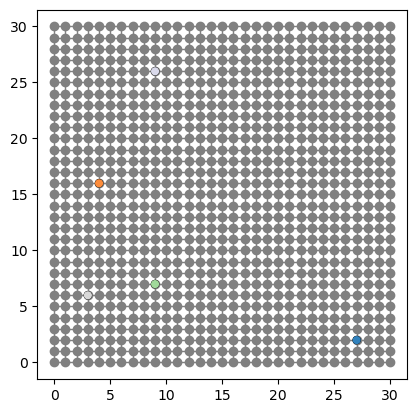

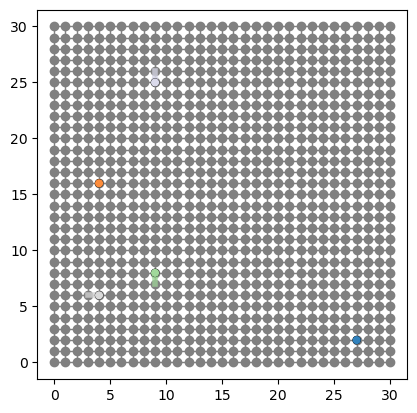

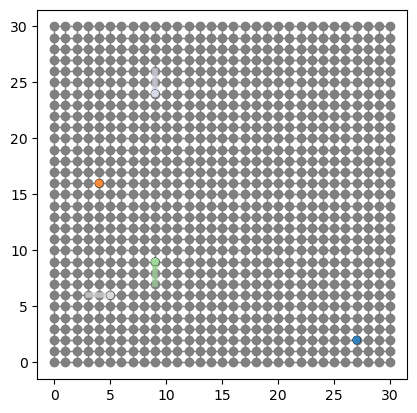

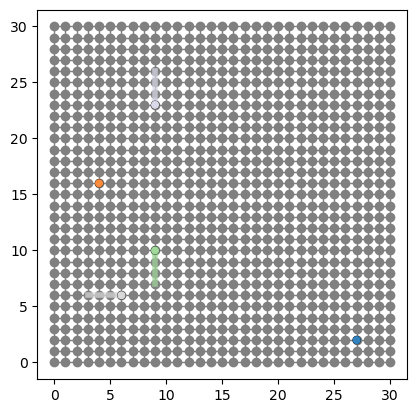

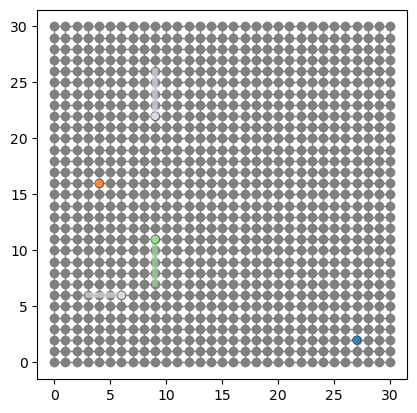

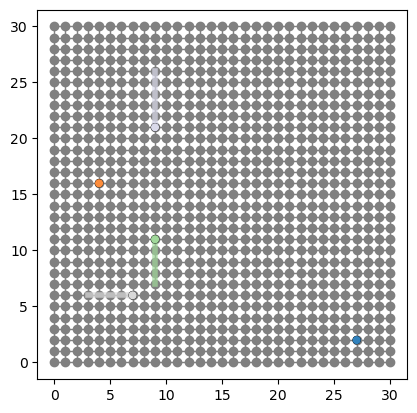

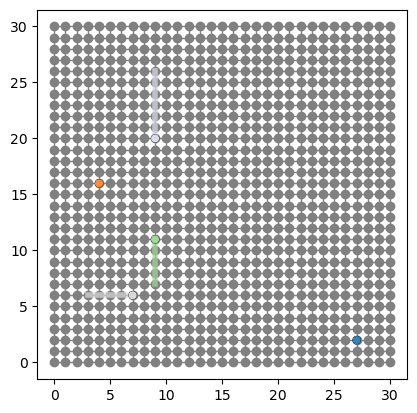

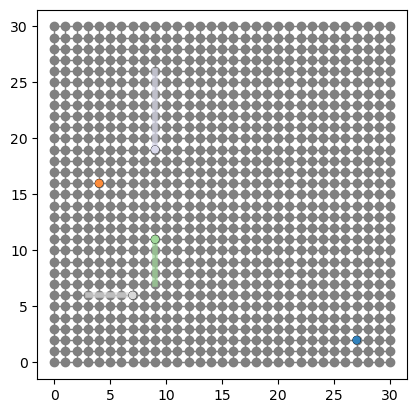

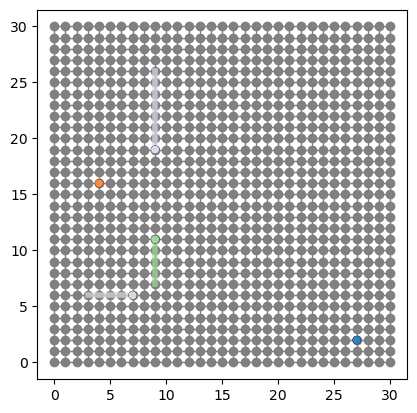

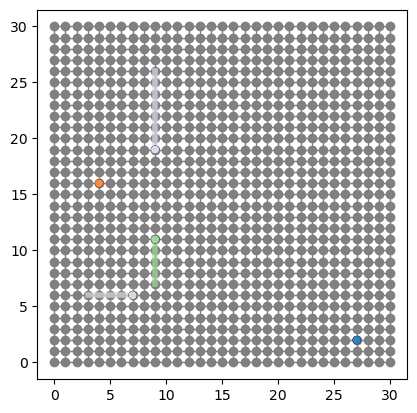

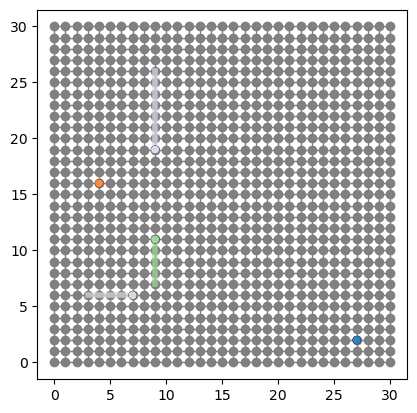

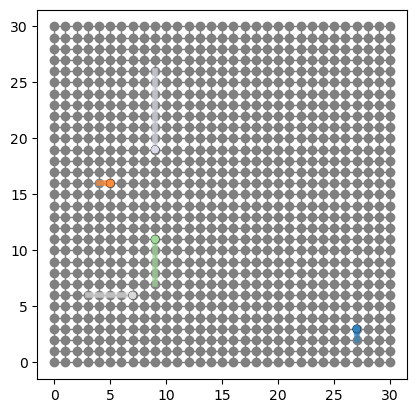

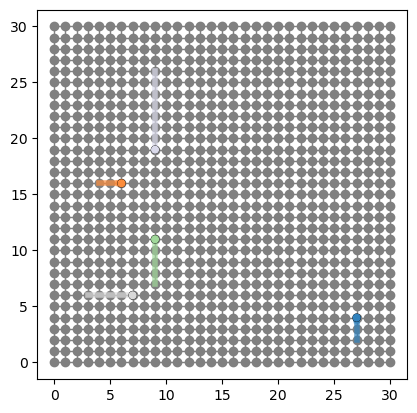

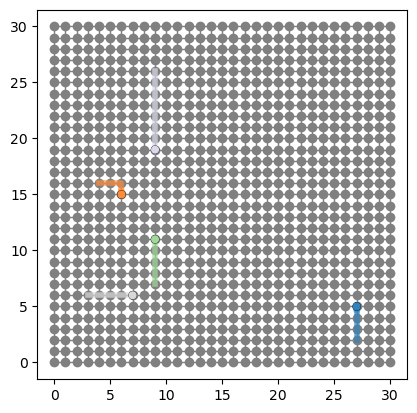

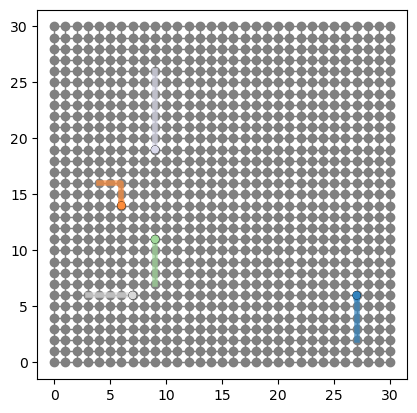

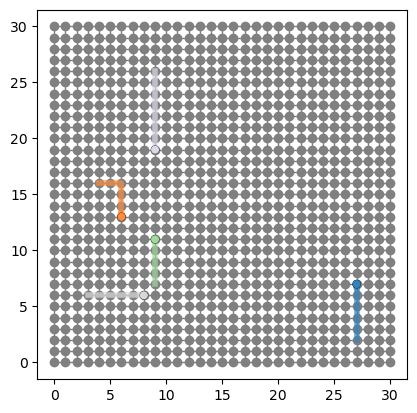

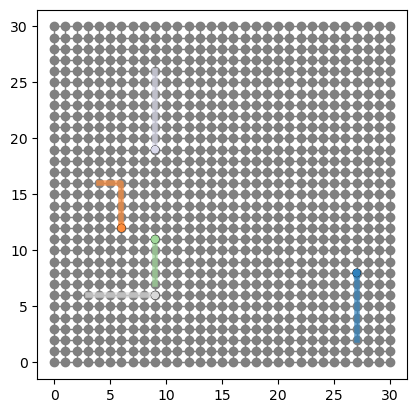

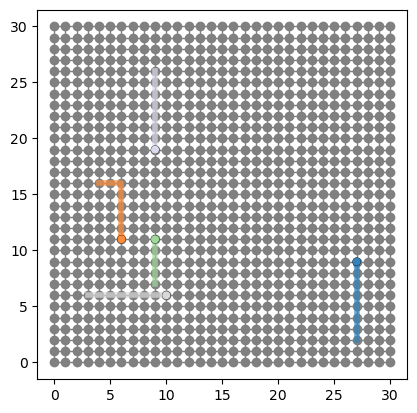

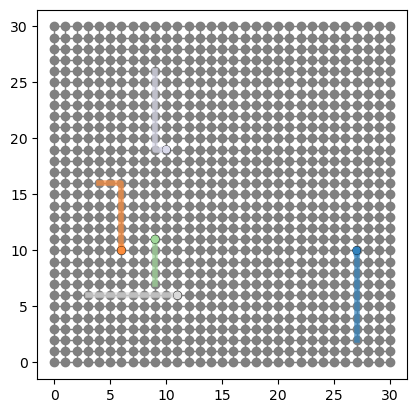

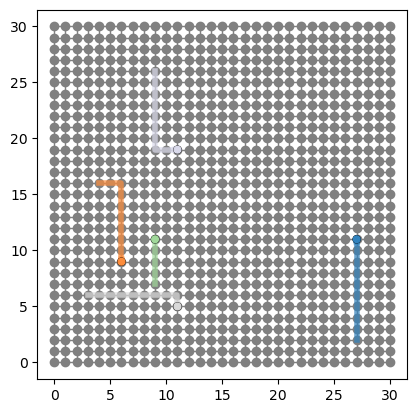

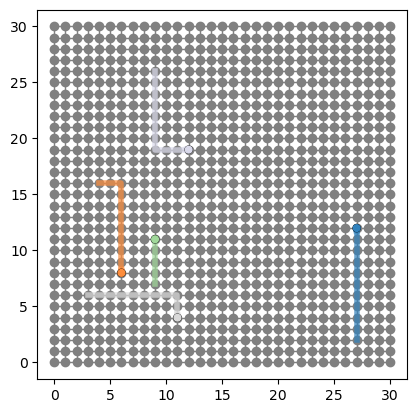

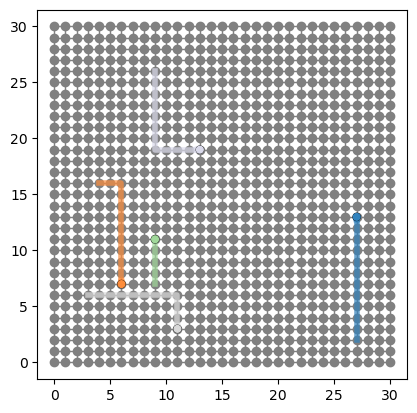

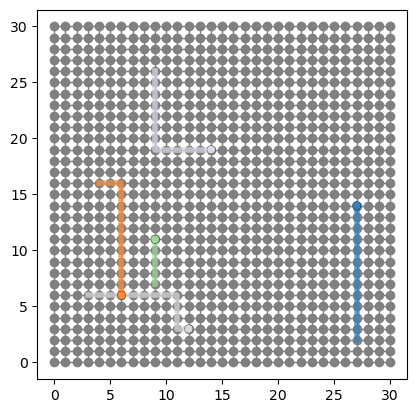

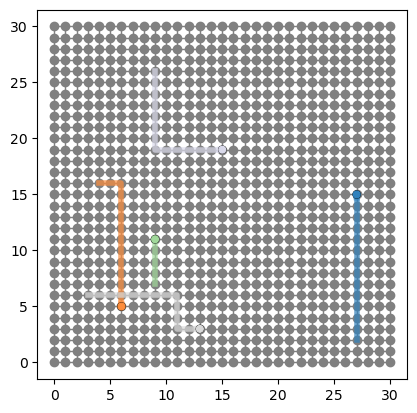

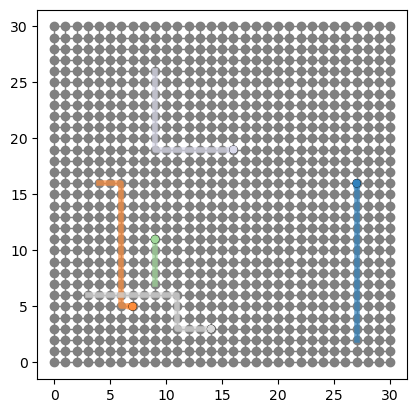

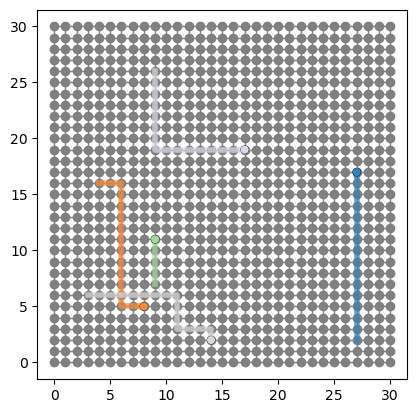

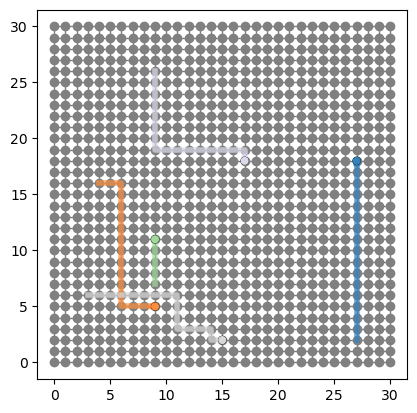

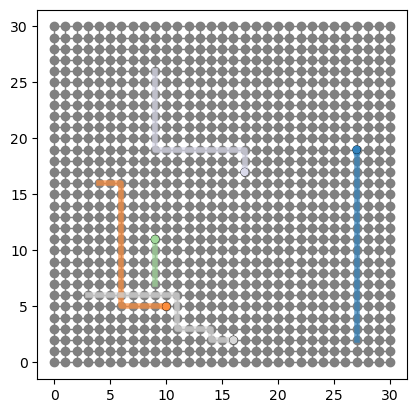

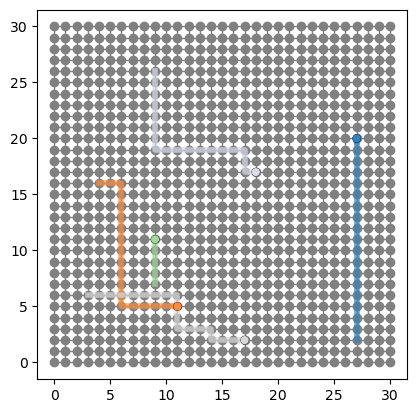

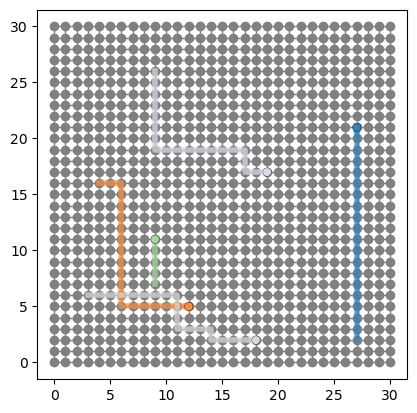

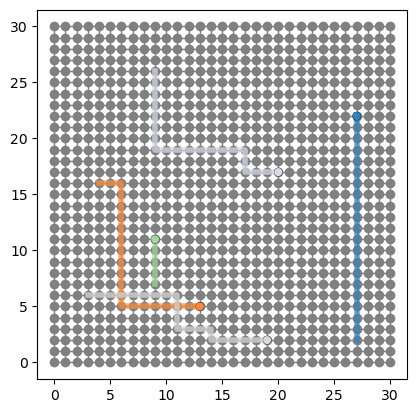

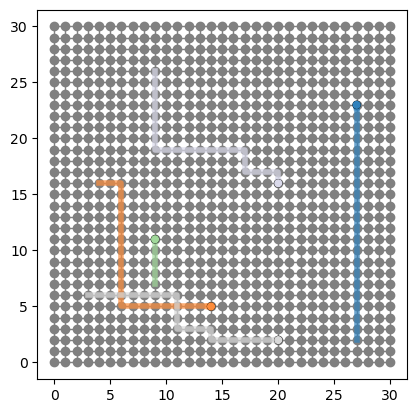

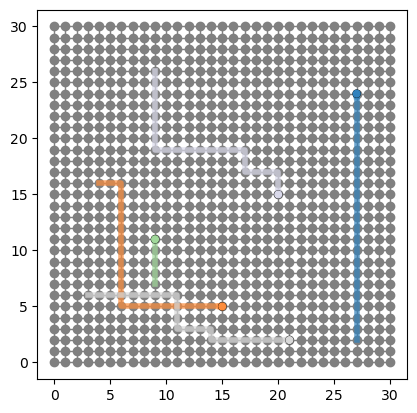

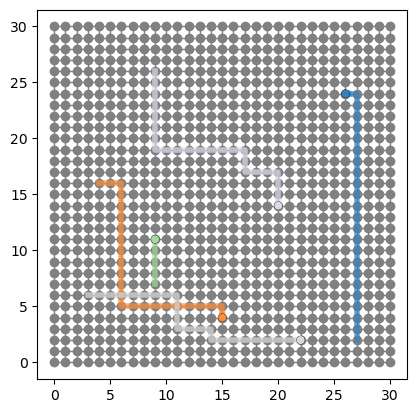

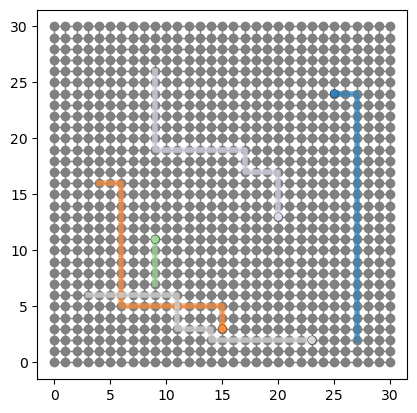

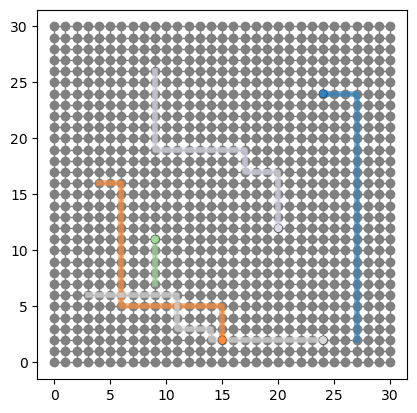

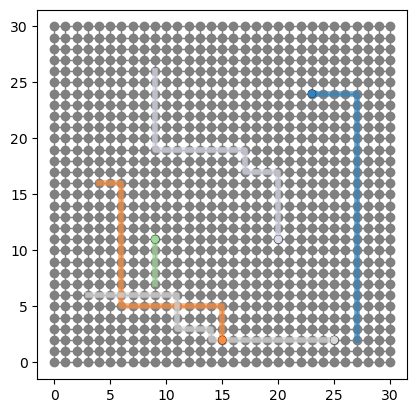

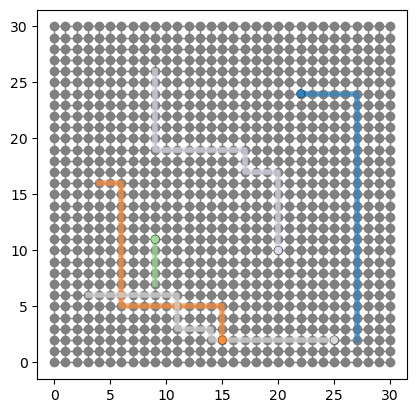

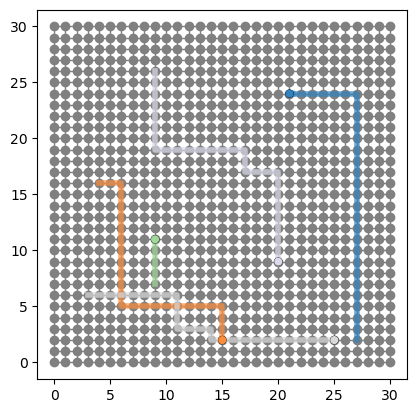

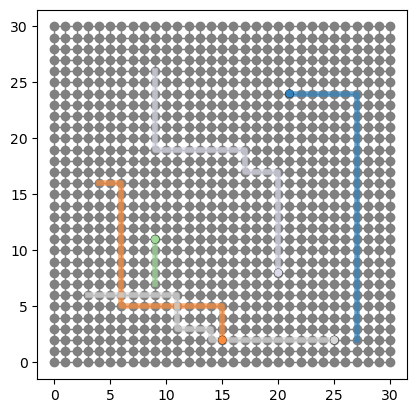

In [14]:
from visualization import show_solution
show_solution(larger_graph, all_paths)